In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
#data collection started from here
#size of image
IMAGE_SIZE=720
#the number of training examples utilized in one iteration
BATCH_SIZE=16
#In a color image, we normally have 3 channels: red, green and blue;
#this way, a color image can be represented as a matrix of dimensions w×h×c, where c is the number of channels
CHANNELS =3
#no of iteration on complete set of data
EPOCHS=100
data=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    #shuffle the dataset
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

NameError: name 'tf' is not defined

In [3]:
class_names=data.class_names

NameError: name 'data' is not defined

In [4]:
#class_names

In [33]:
#len(data)

In [34]:
#for image_batch, label_batch in data.take(1) :
  #  print(image_batch.shape)

In [35]:
#plt.figure(figsize=(10,10))
#for image_batch, label_batch in data.take(1) :
    #for i in range(12) :
        #ax=plt.subplot(3,4,i+1)
        #plt.imshow(image.batch[i].numpy.astype("uint8"))
        #plt.title(class_names[label_batch[i]])
        #plt.axis("off")

In [36]:
#len(data)

In [37]:
#data spliting started here
#80% ==> training
#20% ==> 10% validation, 10% test

In [38]:
#train_size of dataset is defined 80%
train_size = 0.8
len(data)*train_size

34.4

In [39]:
train_ds=data.take(34)
#len(train_ds)

In [40]:
#defining the test dataset size
test_ds=data.skip(34)
#len(test_ds)

In [41]:
val_size=0.1
len(data)*val_size

4.3

In [42]:
val_ds=test_ds.take(4)
len(val_ds)

4

In [43]:
len(val_ds)

4

In [44]:
test_ds=test_ds.skip(4)
len(test_ds)

5

In [45]:
def get__dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000) :
    ds_size= len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split * ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [46]:
train_ds, val_ds, test_ds = get__dataset_partitions_tf(data)

In [47]:
len(train_ds)

34

In [48]:
len(val_ds)

4

In [49]:
len(test_ds)

5

In [50]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
#data preprocessing started from here
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [52]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [53]:
#convolutional neural network started here
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE ,CHANNELS )
n_classes=2
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    #it gives high values and reduce size of image in short it gives the outline of images
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (16, 720, 720, 3)         0         
_________________________________________________________________
sequential_4 (Sequential)    (16, 720, 720, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (16, 718, 718, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (16, 359, 359, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (16, 357, 357, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (16, 178, 178, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (16, 176, 176, 64)       

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

34/34 [==============================] - 451s 12s/step - loss: 0.6034 - accuracy: 0.7858 - val_loss: 0.5013 - val_accuracy: 0.7812


In [32]:
model_version=3
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/2\assets


In [40]:
history.history["accuracy"]

[0.7858473062515259]

In [56]:
model=tf.keras.models.load_model("model/1")

In [57]:
import numpy as np

first image to predict
first image's actual label: normal
predicted label:  positive


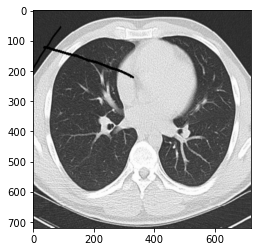

In [58]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [59]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    # Add an outer "batch" dimension to a single element. Align axes for broad
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

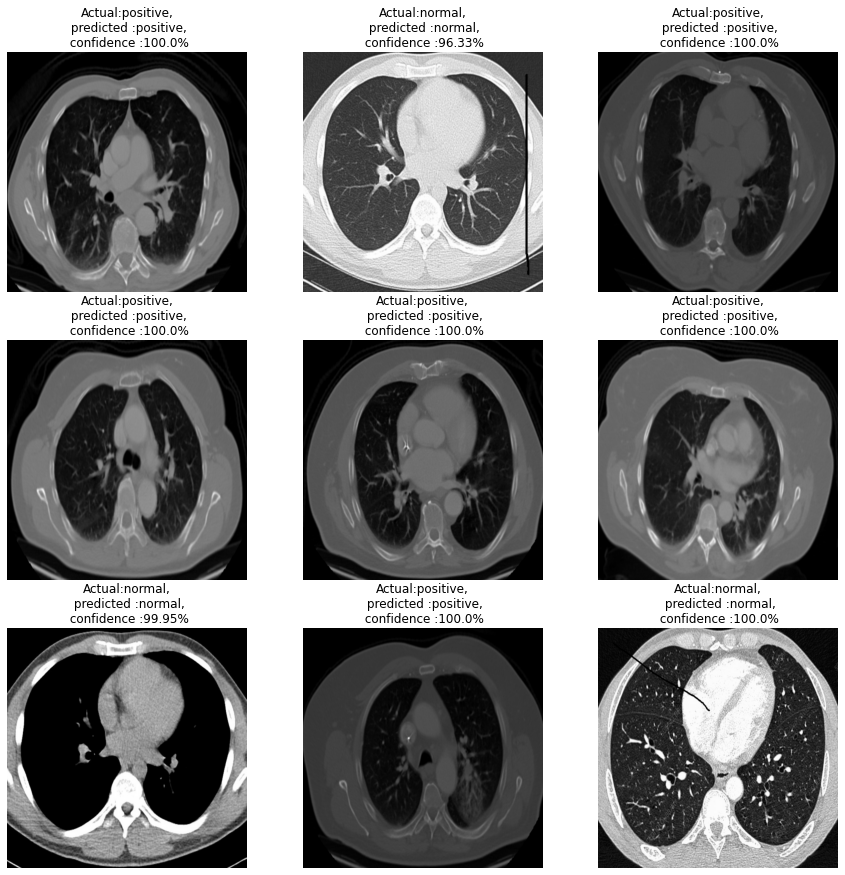

In [36]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9) :
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n predicted :{predicted_class},\n confidence :{confidence}%")
        plt.axis("off")
        